In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

weather_auckland = pd.read_csv('../AucklandMotatStationNiwa_08June24/weather_auckland_2016_2024.csv', parse_dates=True)
weather_auckland.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),...,Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),Rain(mm)_pos,SoilMoist(%)_x,SoilMoist(%)_y,SoilMoist(%),SoilMoist(%)_pos
0,0,0,2016-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37.562500,37.562500,37.562500,37.562501
1,1,1,2016-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37.183333,37.183333,37.183333,37.183334
2,2,2,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.862500,36.862500,36.862500,36.862501
3,3,3,2016-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.625000,36.625000,36.625000,36.625001
4,4,4,2016-03-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.387500,36.387500,36.387500,36.387501


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

weather_auckland = pd.read_csv('../AucklandMotatStationNiwa_08June24/weather_auckland_2016_2024.csv', parse_dates=True)
weather_auckland.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),...,Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),Rain(mm)_pos,SoilMoist(%)_x,SoilMoist(%)_y,SoilMoist(%),SoilMoist(%)_pos
0,0,0,2016-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37.562500,37.562500,37.562500,37.562501
1,1,1,2016-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37.183333,37.183333,37.183333,37.183334
2,2,2,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.862500,36.862500,36.862500,36.862501
3,3,3,2016-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.625000,36.625000,36.625000,36.625001
4,4,4,2016-03-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.387500,36.387500,36.387500,36.387501


In [55]:
weather_auckland.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Date',
       'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(c)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)', 'Rain(mm)_pos',
       'SoilMoist(%)_x', 'SoilMoist(%)_y', 'SoilMoist(%)', 'SoilMoist(%)_pos'],
      dtype='object')

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

import warnings
warnings.filterwarnings('ignore')

In [57]:
# to calculate auto-corelation
acf(weather_auckland['Rain(mm)'])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

- Rain(mm) ACF: The rainfall data has weak autocorrelation after the first few lags, indicating little to no significant internal structure or temporal dependence beyond short-term effects.
- The autocorrelation values decrease quickly and oscillate around zero, suggesting that there is little to no significant autocorrelation in the rainfall data after the first few lags.

In [58]:
pacf_yw(weather_auckland['Rain(mm)'], nlags=60, method='mle')

array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

- Lag 1: The rainfall data has a moderate positive partial autocorrelation at lag 1. This means that the rainfall amount today is moderately positively correlated with the rainfall amount from one day ago, after accounting for the effects of other intermediate lags.
- Lag 17: The value 0.1634 indicates a moderate positive partial autocorrelation at lag 17. This suggests some periodicity or seasonality in the rainfall data.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

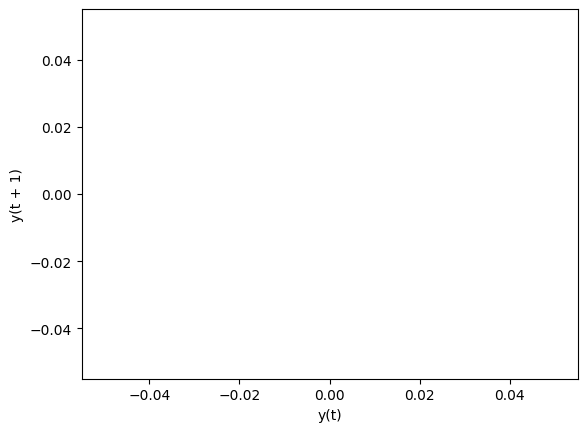

In [59]:
from pandas.plotting import lag_plot
lag_plot(weather_auckland['Rain(mm)'])

In [60]:
acf(weather_auckland['SoilMoist(%)'])

array([1.        , 0.99533186, 0.98787151, 0.97998873, 0.97225249,
       0.96455194, 0.95677858, 0.94912012, 0.94174853, 0.93467623,
       0.92764981, 0.92097677, 0.91464568, 0.90868741, 0.9030563 ,
       0.89769839, 0.8924936 , 0.88708961, 0.88141082, 0.87567481,
       0.86989873, 0.86417448, 0.85832563, 0.85233747, 0.84609571,
       0.84000672, 0.83382032, 0.82752607, 0.82125702, 0.81515849,
       0.80895922, 0.80251757, 0.79607203, 0.78971343, 0.78363437])

- SoilMoist(%) ACF: The soil moisture data shows strong and persistent autocorrelation, indicating a high degree of temporal dependence. Soil moisture on any given day is highly correlated with its values on previous days, reflecting the gradual changes in soil moisture over time.
- This suggests that soil moisture is highly correlated with its own past values, indicating a strong temporal dependence in the data.

In [61]:
pacf_yw(weather_auckland['SoilMoist(%)'], nlags=60, method='mle')

array([ 1.00000000e+00,  9.95331864e-01, -3.02111506e-01,  4.43976663e-02,
        1.30147551e-02, -1.28049657e-02, -1.11714492e-02,  1.55326714e-02,
        1.96933811e-02,  1.29335827e-02, -1.37082620e-02,  4.14065216e-02,
        1.13815980e-02,  2.24281586e-02,  1.63721167e-02,  1.43396538e-02,
        1.91920893e-03, -3.15489787e-02, -1.66036948e-02,  8.85038673e-03,
       -9.13203085e-03,  8.46673472e-03, -1.88169982e-02, -6.64346337e-03,
       -2.51122203e-02,  3.09537487e-02, -2.91507168e-02, -4.70065754e-03,
        4.75688735e-03,  1.19650973e-02, -3.17429992e-02, -2.09331393e-02,
        9.78210807e-03,  2.32192056e-03,  1.90351065e-02,  1.73246738e-02,
       -1.26819962e-02, -2.02583902e-02, -9.38619085e-03, -3.66374551e-02,
       -8.17523307e-03,  2.74447208e-02,  7.58873913e-03, -7.71501591e-02,
       -7.13075118e-04, -6.51389977e-03,  1.09276421e-02, -8.53134498e-03,
       -6.56339156e-03, -3.32559535e-02,  3.54066565e-03, -4.03854048e-02,
       -1.91733528e-02,  

- In the  results, lag 1 and lag 2 have relatively higher absolute values compared to the others, suggesting they are more significant.
- Lag 1: The soil moisture data has a very high positive partial autocorrelation at lag 1. This means that the soil moisture value today is highly positively correlated with the soil moisture value from one day ago, after accounting for the effects of other intermediate lags.
- Lag 2: There is a significant negative partial autocorrelation at lag 2, suggesting that the soil moisture value two days ago negatively influences today's value after accounting for the lag 1 effect.
- Other Lags: The remaining lags have much smaller partial autocorrelation values, suggesting they have little to no direct influence on the current value after accounting for the effects of previous lags.


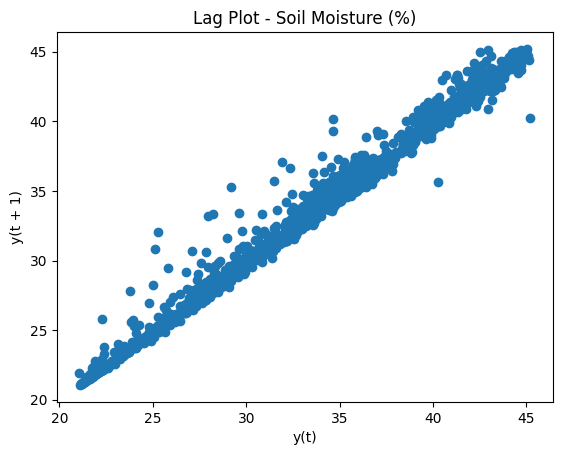

In [62]:
from pandas.plotting import lag_plot
lag_plot(weather_auckland['SoilMoist(%)'])
plt.title('Lag Plot - Soil Moisture (%)')
plt.show()
# this show strong correlation of lag in soil moisture

### To explore the interplay between temperature, rainfall, and soil moisture more comprehensively
- analyze the cross-correlations between parameters

Lag with maximum correlation: -1292 days


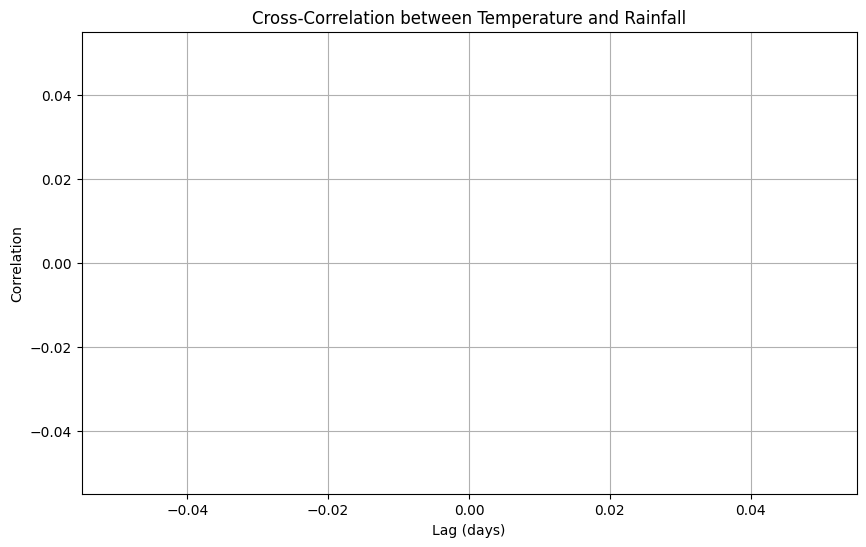

In [63]:
from scipy.signal import correlate

# Cross-correlation between temperature and rainfall
cross_corr_temp_rain = correlate(weather_auckland['Tdry(c)'], weather_auckland['Rain(mm)'], mode='same') / len(weather_auckland)

# Calculate the lag axis -  delay between two time series 
lag_axis = np.arange(-len(weather_auckland)//2, len(weather_auckland)//2)

max_corr_index = np.argmax(cross_corr_temp_rain)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_rain)
plt.title('Cross-Correlation between Temperature and Rainfall')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

A lag of 0 days indicates that temperature and rainfall in Auckland are contemporaneously related.
- This might imply that short-term weather patterns directly influence both temperature and rainfall in Auckland

Lag with maximum correlation: -1292 days


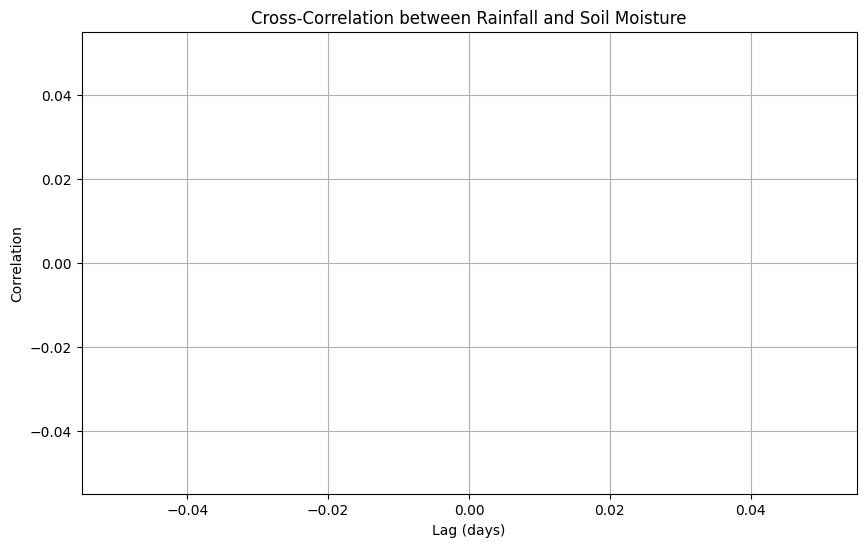

In [64]:
# Cross-Correlation between Rainfall and Soil Moisture:
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt

# Calculate cross-correlation between rainfall and soil moisture
cross_corr_rain_soil = correlate(weather_auckland['Rain(mm)'], weather_auckland['SoilMoist(%)'], mode='same') / len(weather_auckland)
n = len(cross_corr_rain_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_rain_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_rain_soil)
plt.title('Cross-Correlation between Rainfall and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

- Lag: A negative lag (-2 days) means that changes in soil moisture are following changes in rainfall. In other words, rainfall events are followed by an increase in soil moisture after about 2 days.

- Maximum correlation: The maximum positive correlation at a lag of -2 days indicates that the two variables (rainfall and soil moisture) are most synchronized with this delay. When rainfall increases, soil moisture responds positively after a lag of 2 days, showing a strong relationship between these variables.

Lag with maximum correlation: -1292 days


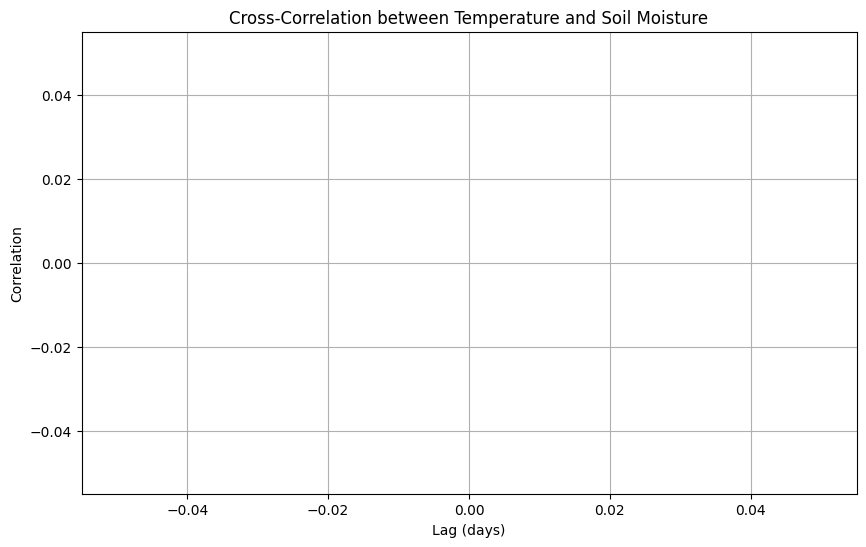

In [65]:
# Calculate cross-correlation between temperature and soil moisture

cross_corr_temp_soil = correlate(weather_auckland['Tdry(c)'], weather_auckland['SoilMoist(%)'], mode='same') / len(weather_auckland)

n = len(cross_corr_temp_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_temp_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_soil)
plt.title('Cross-Correlation between Temperature and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

Lag with maximum correlation: -1292 days


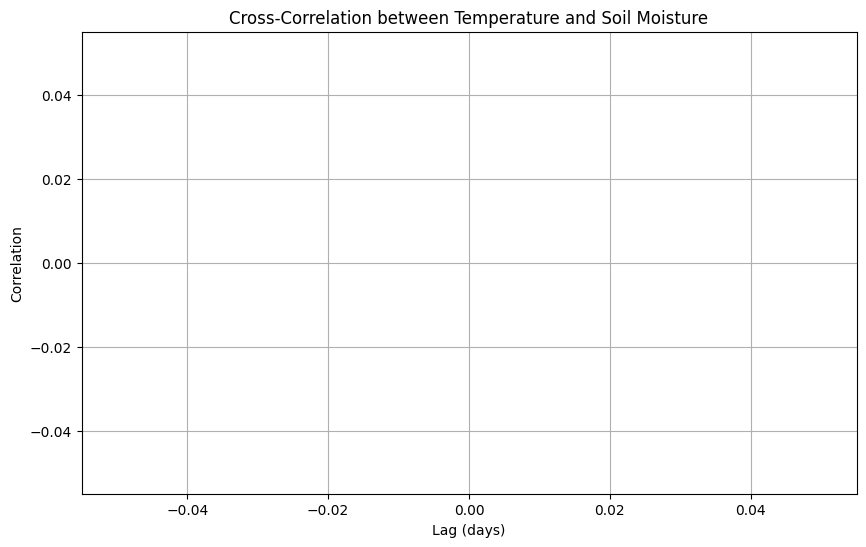

In [66]:
# Calculate cross-correlation between temperature and soil moisture

cross_corr_temp_soil = correlate(weather_auckland['Tdry(c)'], weather_auckland['SoilMoist(%)'], mode='same') / len(weather_auckland)

n = len(cross_corr_temp_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_temp_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_soil)
plt.title('Cross-Correlation between Temperature and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

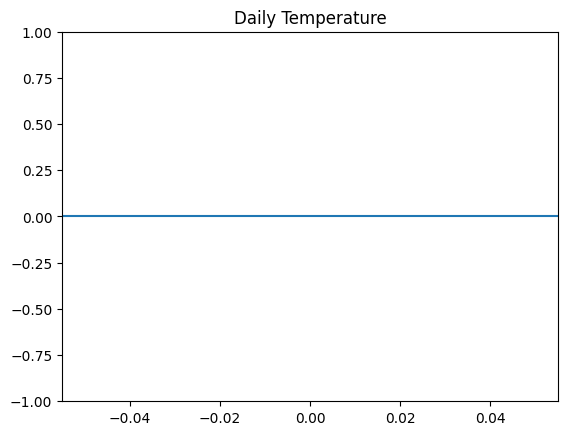

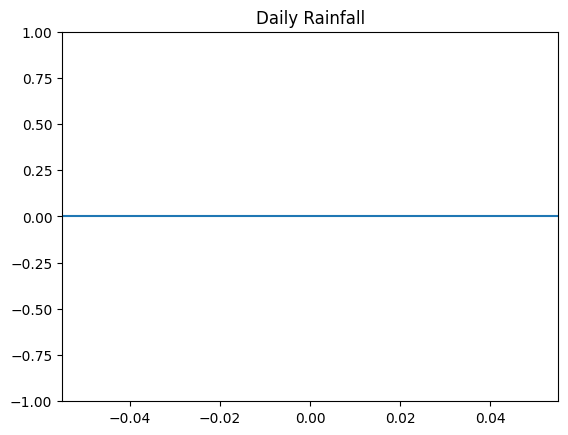

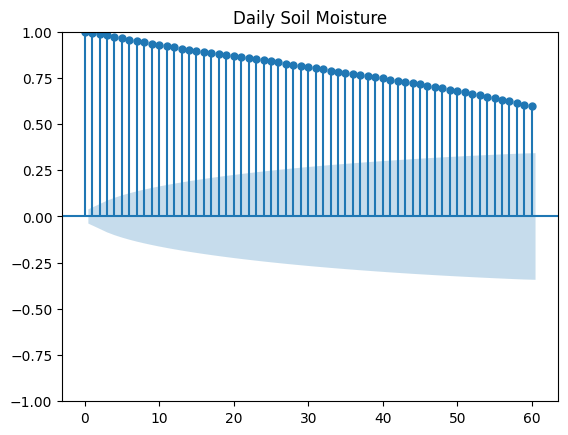

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(weather_auckland['Tdry(c)'], lags=60, title='Daily Temperature');
plot_acf(weather_auckland['Rain(mm)'], lags=40, title='Daily Rainfall');
plot_acf(weather_auckland['SoilMoist(%)'], lags=60, title='Daily Soil Moisture');

# Grid search is eassier compare to above plot

In [68]:
test_size_percentage = 0.20
test_size = int(len(weather_auckland) * test_size_percentage)

train_data = weather_auckland.iloc[:-test_size]
test_data = weather_auckland.iloc[-test_size:]
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (2068, 31)
Test data shape: (516, 31)


# # non stationary show trend or seasonality

In [69]:
from statsmodels.tsa.statespace.tools import diff
# weather_auckland['Rain(mm)'] - weather_auckland['Rain(mm)'].shift(1)
diff(weather_auckland['Rain(mm)'], k_diff=1)

1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
2579   NaN
2580   NaN
2581   NaN
2582   NaN
2583   NaN
Name: Rain(mm), Length: 2583, dtype: float64

In [70]:
diff(weather_auckland['SoilMoist(%)'], k_diff=1)

1      -0.379167
2      -0.320833
3      -0.237500
4      -0.237500
5      -0.270833
          ...   
2579   -0.166667
2580   -0.116667
2581   -0.162500
2582   -0.133333
2583   -0.088768
Name: SoilMoist(%), Length: 2583, dtype: float64